In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
elon_musk = pd.read_csv("D:\\Assignment\\11. Assignment_11_text mining\\Elon_musk.csv" ,error_bad_lines = False)
elon_musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
elon_musk.shape

(1999, 2)

In [4]:
! pip install spacy

In [5]:
import string
import spacy
from matplotlib.pyplot import imread

In [6]:
!python -m spacy download en_core_web_md

2022-01-12 15:02:00.763886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 15:02:00.763933: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
 

In [7]:
tweet = elon_musk.drop(["Unnamed: 0"],axis =1)

In [8]:
tweet

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Preprocessing

In [9]:
# TEXT CLEANING

In [10]:
tweet=[Text.strip() for Text in tweet.Text]# remove both leading and trailing characters

In [11]:
tweet = [Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [12]:
len(tweet)

1999

In [13]:
# Joining the list into one string/text

In [14]:
text = ' '.join(tweet)
text

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [15]:
len(text)

158805

In [16]:
# remove punctuations
text1 = text.translate(str.maketrans('','' , string.punctuation))
text1

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [17]:
len(text1)

148135

In [18]:
# Remove stopwords
# nltk = natural langauge tool kit
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization

In [19]:
# Tokenization
from nltk.tokenize import word_tokenize
text_toke = word_tokenize(text1)
text_toke[0:50]

['kunalb11',
 'I�m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo']

In [20]:
len(text_toke)

21122

# Stopwords

In [21]:
import nltk
nltk.download("stopwords")

my_stop_words = stopwords.words("english")
my_stop_words.append("Haha")
text_stop = [word for word in text_toke if  not word in my_stop_words]
text_stop[:50]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb11',
 'I�m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets']

In [22]:
len(text_stop)

15855

# Normalize the data

In [23]:
# Normalize the data
lower_words = [word.lower() for word in text_stop]
lower_words[:50]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets']

In [24]:
# Stemming
from nltk.stem import PorterStemmer

In [25]:
ps = PorterStemmer()
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:50]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet']

In [26]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.


2022-01-12 15:09:06.226059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-12 15:09:06.226136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
 

In [27]:
#Lemmatization
nlp = spacy.load('en_core_web_sm')
text_1 =nlp(' '.join(lower_words))
text_1[0:50]

kunalb11 i�m alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 thanks flcnhvy anonyx10

In [28]:
lema_word = [word.lemma_ for word in text_1]
print(lema_word[0:50])

['kunalb11', 'I', '�', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'thanks', 'flcnhvy', 'anonyx10']


In [29]:
final_tweet = ' '.join(lema_word)
print(final_tweet[0:50])

kunalb11 I � m alien idaacarmack ray trace cyberpu


# Feature extraction

In [30]:
 from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorize = CountVectorizer()
x = vectorize.fit_transform(lema_word)
x

<17032x4933 sparse matrix of type '<class 'numpy.int64'>'
	with 15489 stored elements in Compressed Sparse Row format>

In [32]:
print(vectorize.get_feature_names()[70:120])

['300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th', '4thfromourstar', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '727pm', '74', '78', '7th', '90', '9007', '91demigod', '922', '948']


In [33]:
# Wordcloud

In [34]:
! pip install WordCloud 

In [35]:
from wordcloud import WordCloud, STOPWORDS

In [36]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

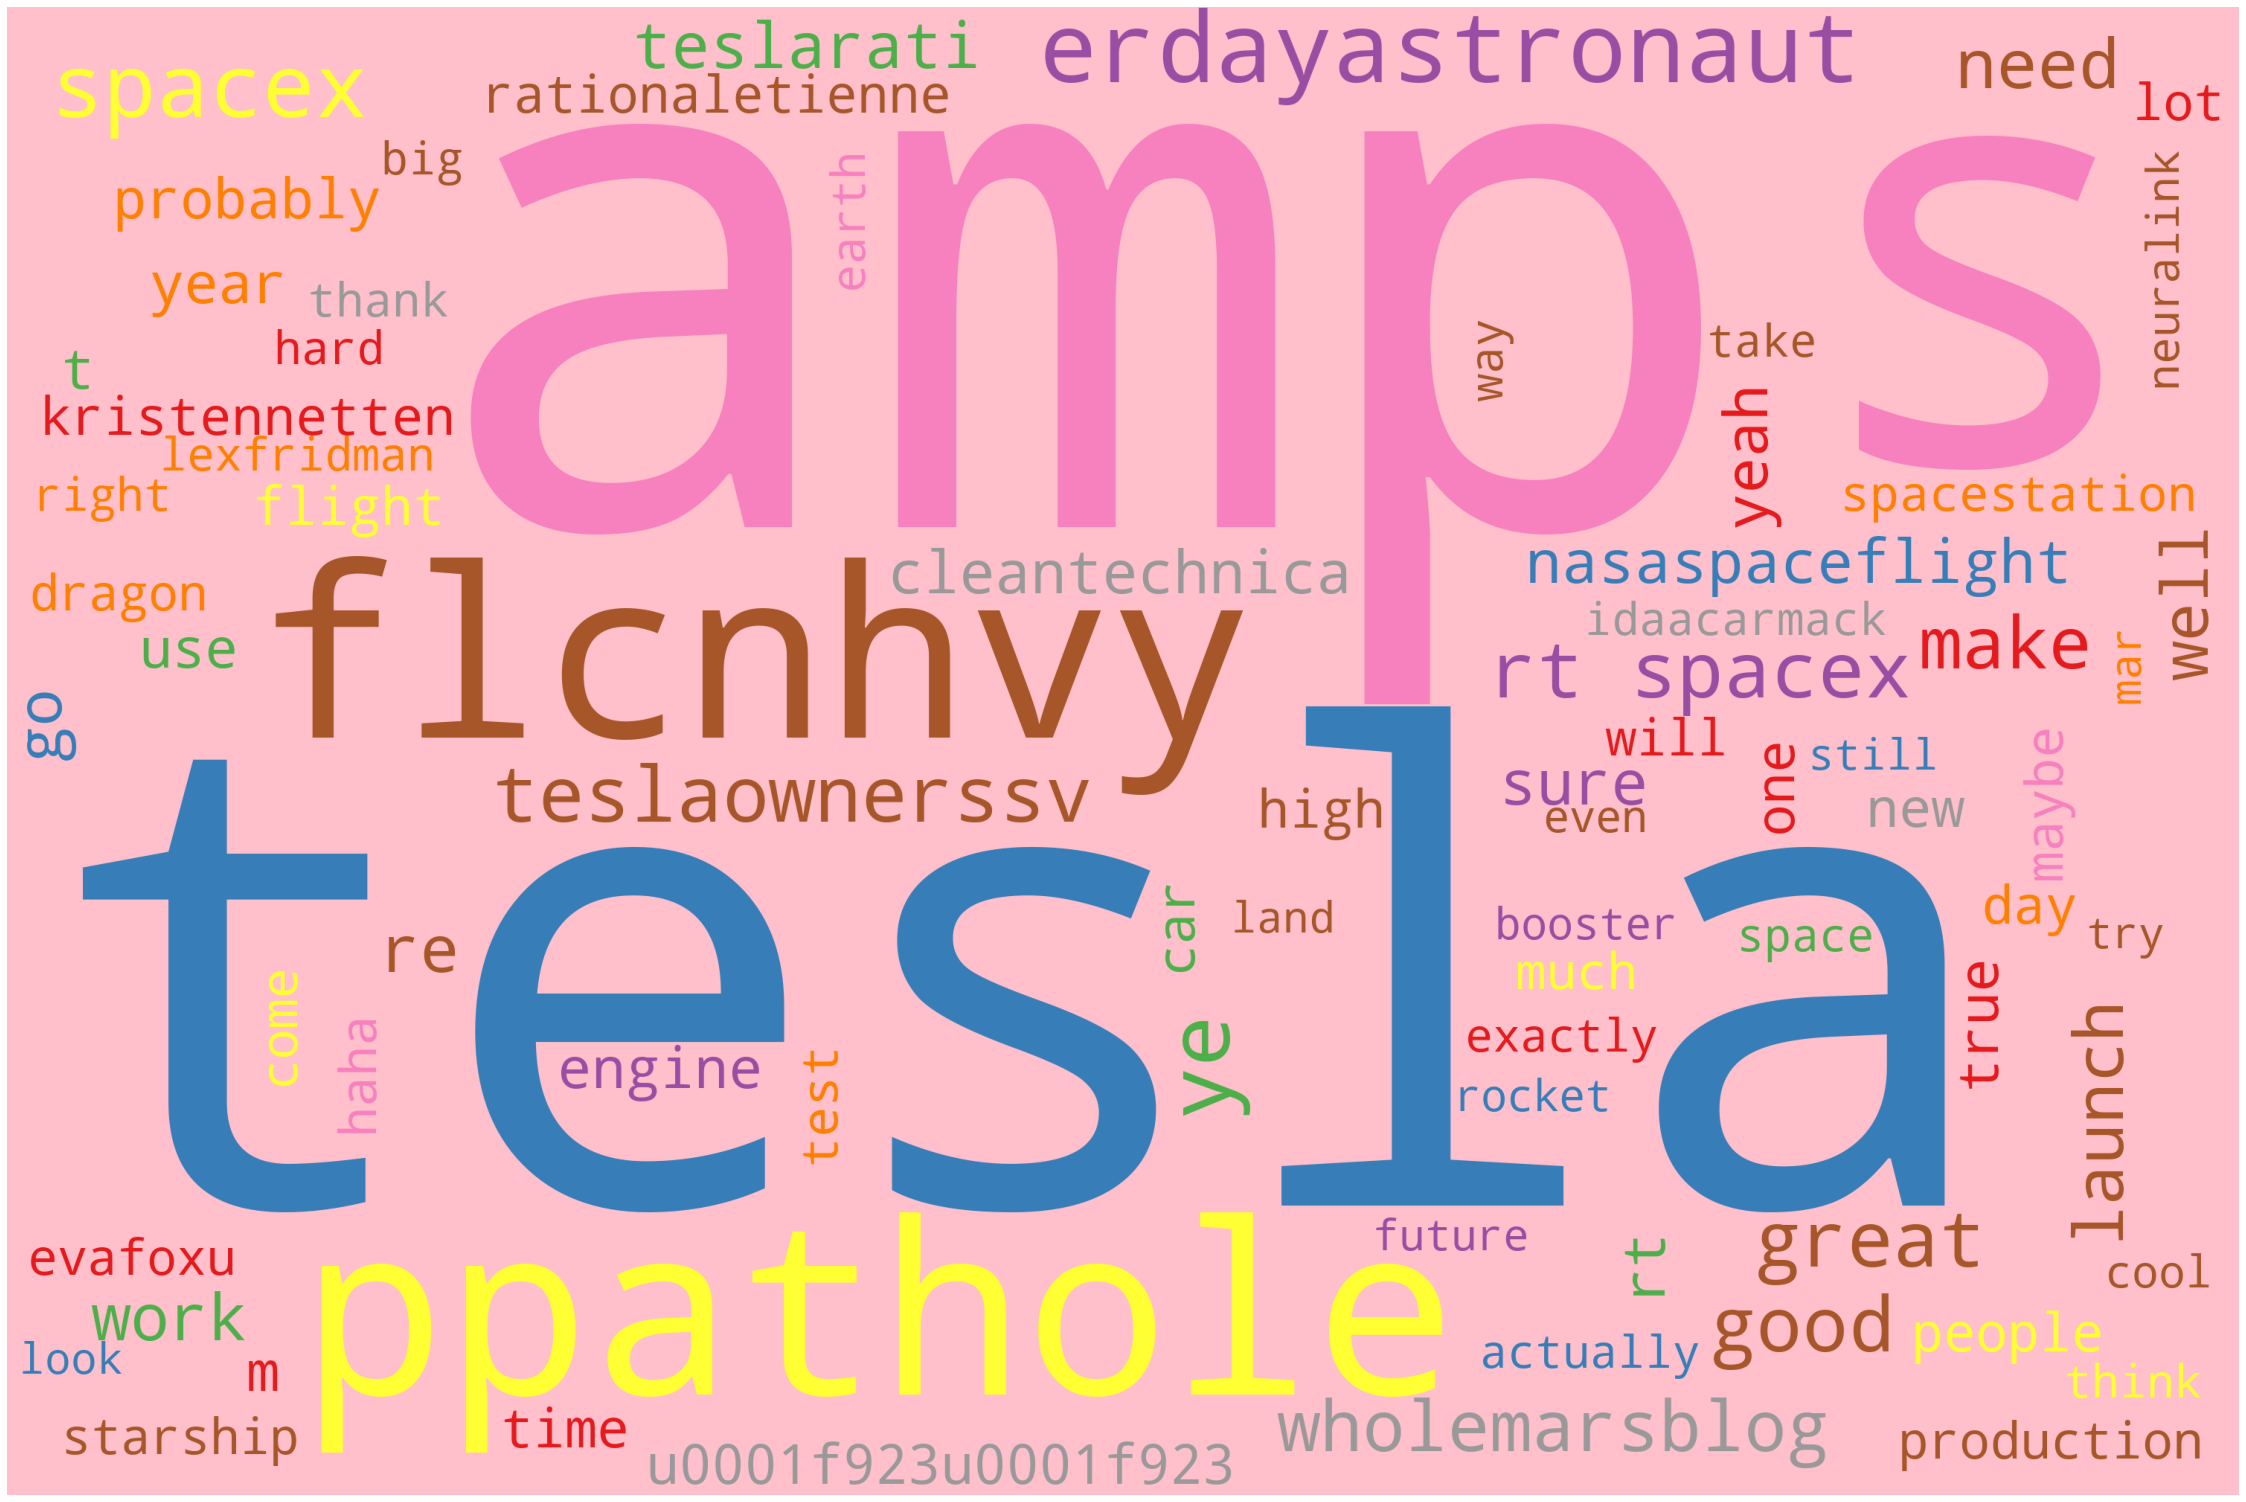

In [37]:
# Generate word cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='pink',max_words=80,colormap='Set1' ).generate(final_tweet)
plot_cloud(wordcloud)

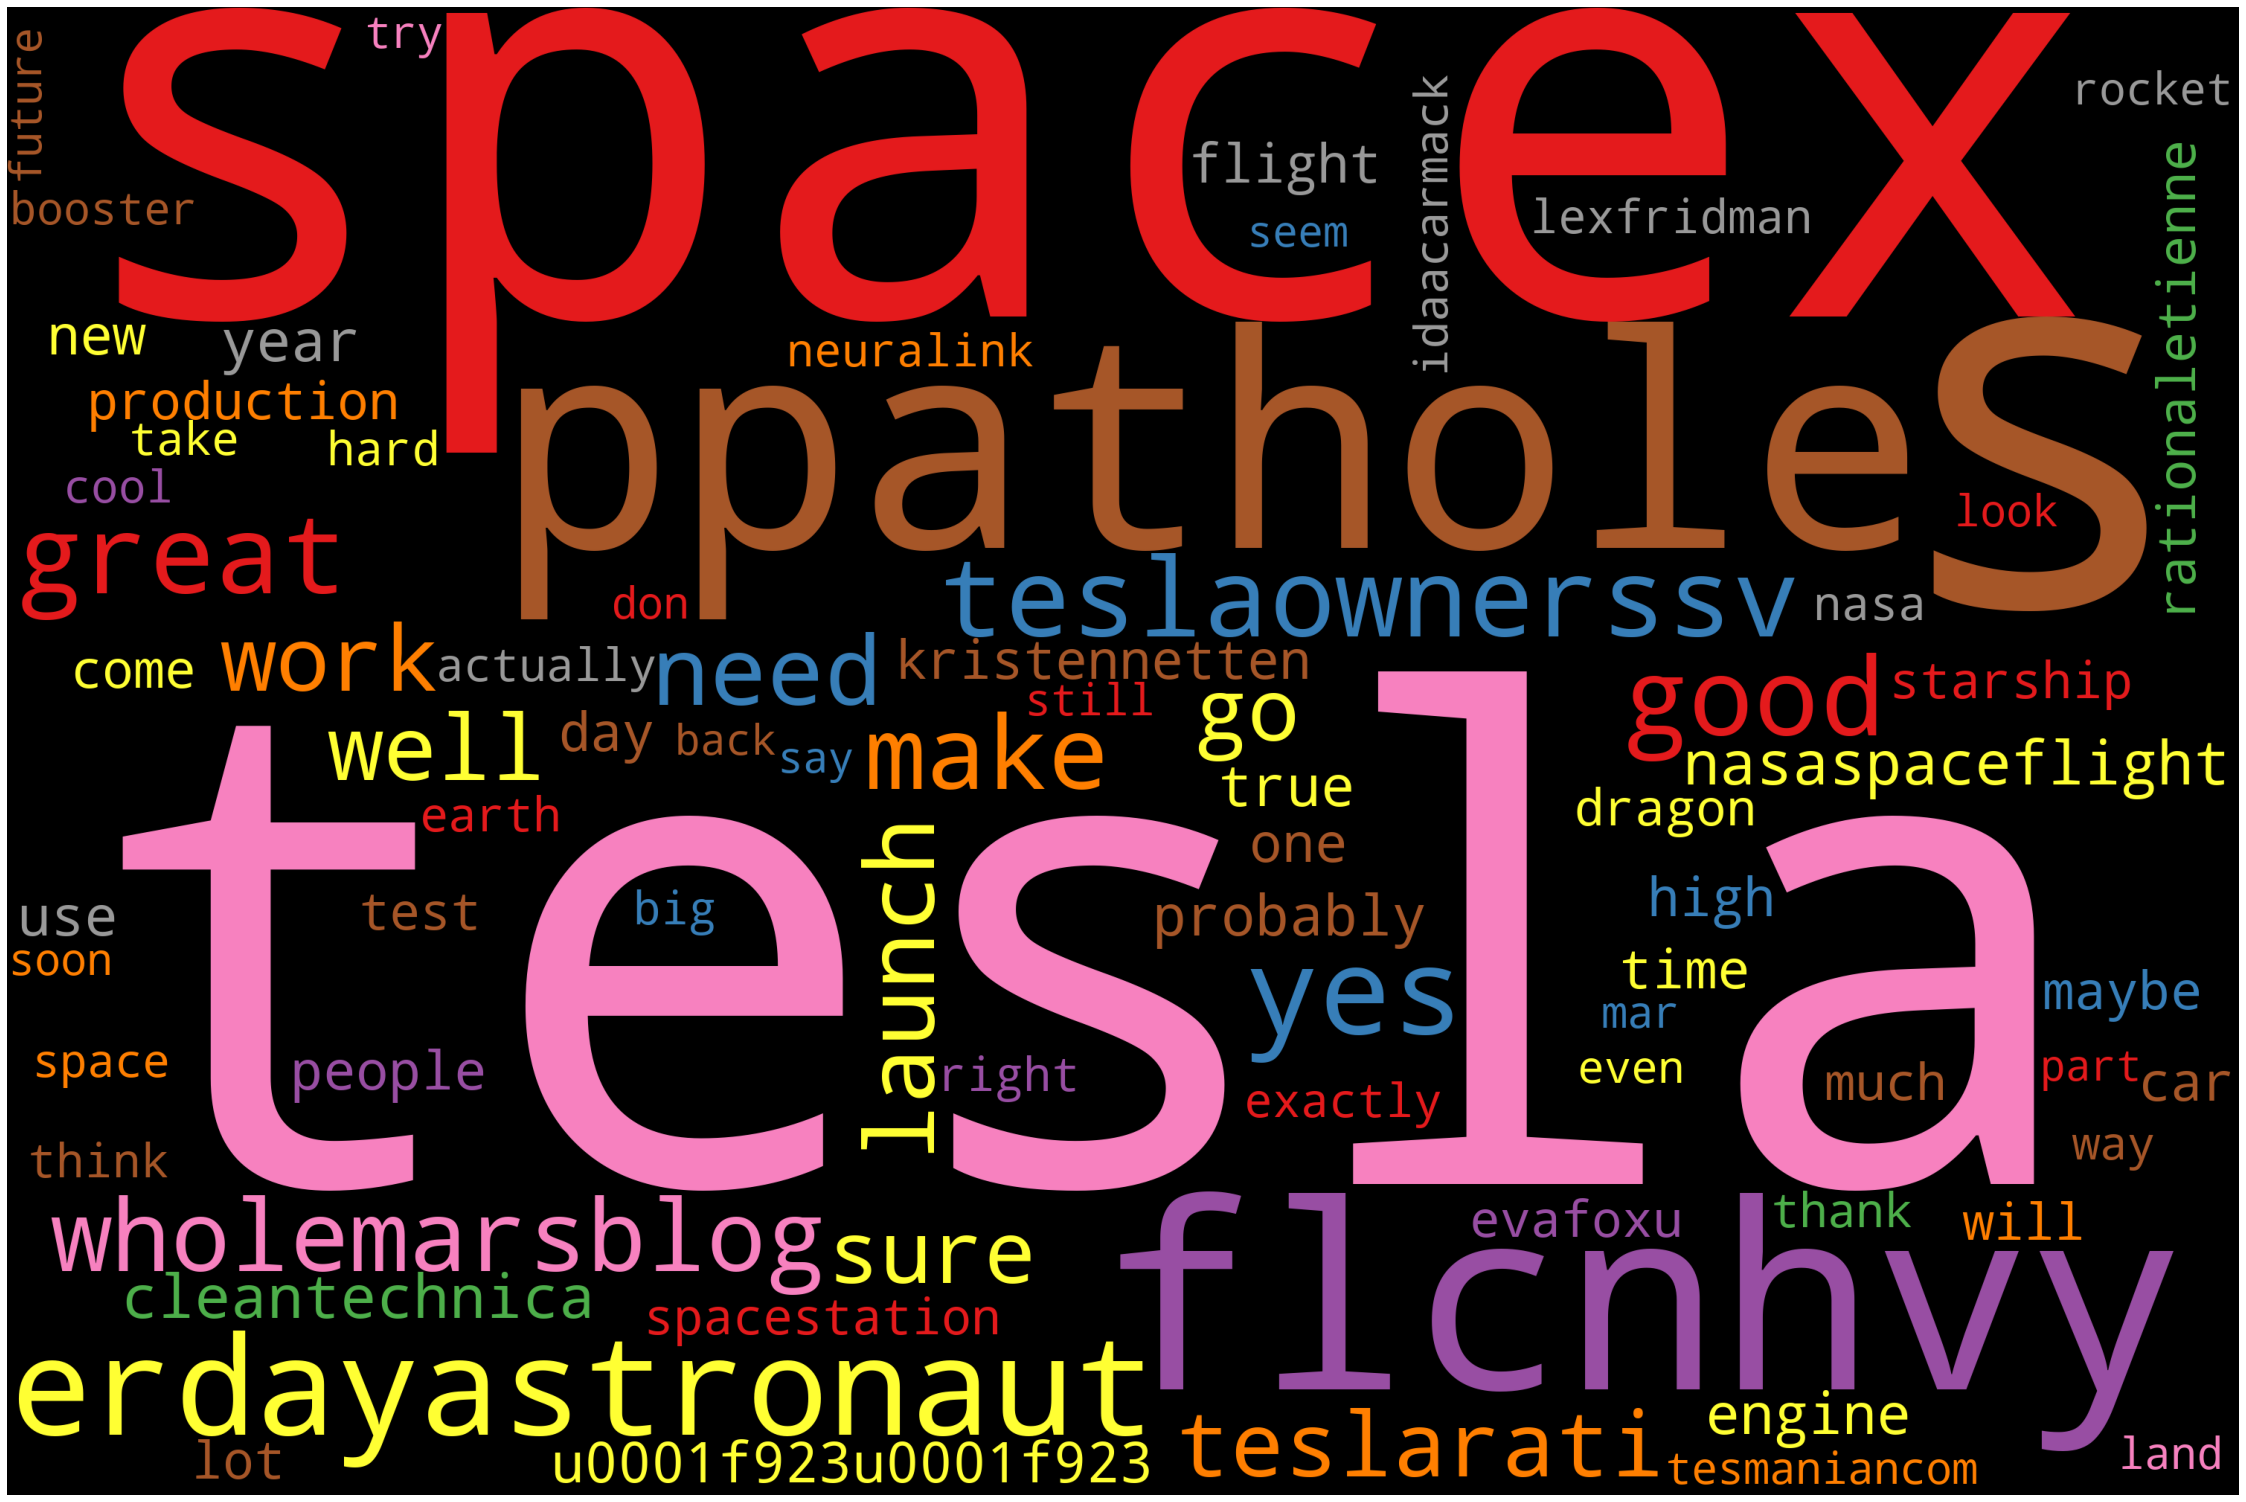

In [38]:
STOPWORDS.add('amp')
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
STOPWORDS.add('m')
STOPWORDS.add('ye')
STOPWORDS.add('haha')
STOPWORDS.add('t')
STOPWORDS.add('re')

wordcloud1=WordCloud(width=3000,height=2000,background_color='black',max_words=80,
                   colormap='Set1',stopwords=STOPWORDS).generate(final_tweet)
plot_cloud(wordcloud1)

# Emotion Mining

In [40]:
afinn = pd.read_csv("D:\\Assignment\\11. Assignment_11_text mining\\Afinn.csv")

In [41]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [42]:
afinn.shape

(2477, 2)

In [43]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
 from nltk import tokenize

In [45]:
sentence = tokenize.sent_tokenize(" ".join(tweet))
sentence

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [46]:
sent_df = pd.DataFrame(sentence ,columns =['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [47]:
# Custom function: score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [48]:
calculate_sentiment(text='very sad')

-2

In [49]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [50]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
909    11
910    31
911     3
912    47
913    15
Name: word_count, Length: 914, dtype: int64

In [51]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the �poor inventor� card, but was ric...",-5,34
910,"It may never pay out, as the stock can�t b� ht...",-4,31
...,...,...,...
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven�t observed the� https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [52]:
sent_df.sort_values(by='sentiment_value',ascending=False)

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven�t observed the� https://t.co/mez...,15,72
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
...,...,...,...
604,"Then static fire, checkouts, static fire, fly ...",-4,12
473,"He plays the �poor inventor� card, but was ric...",-5,34
64,"Also, the road to hell is mostly paved with ba...",-7,11
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61


In [53]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [54]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>15]

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

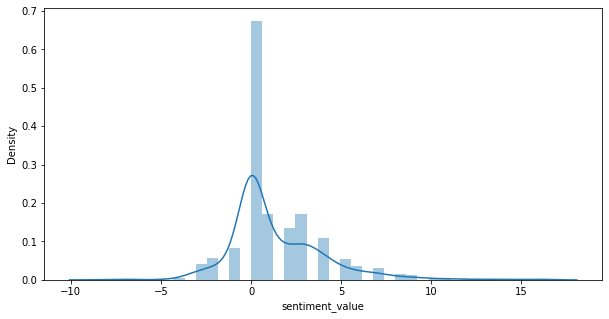

In [55]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(10,5))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

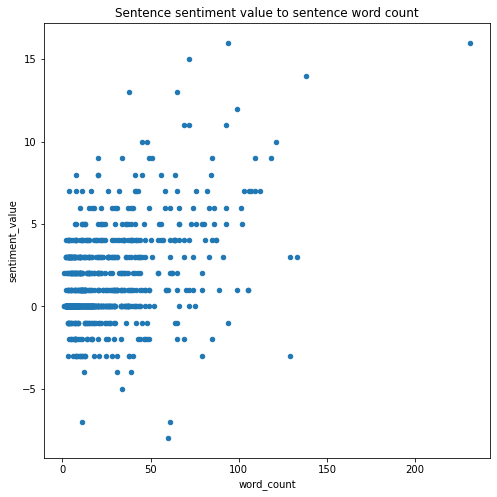

In [56]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [57]:
# Review of Apple iPhone 11 Pro

In [58]:
text=["You Have to Love APPLE because they not only make amazing product they make Magic I loved specially the Ultrawide Angle camera and the Hell of a Beast of a Processor .A13Bionic , I am an Engineer and the way Apple Presented the Chip on the stage blew my mind.that small piece of hardware has 8.5 Billion transistor and based on 7NM architecture . simple word its like a Lamborgini and other Chips are Honda ! Finally this is gonna be the beast of a phone and another thing that made me happy Apple might manufacture and assemble these phones in India itself! Kudos Apple You did an Amazing work! Yourthe Best"]

In [59]:
sentence1 = tokenize.sent_tokenize(" ".join(text))
sentence1

['You Have to Love APPLE because they not only make amazing product they make Magic I loved specially the Ultrawide Angle camera and the Hell of a Beast of a Processor .A13Bionic , I am an Engineer and the way Apple Presented the Chip on the stage blew my mind.that small piece of hardware has 8.5 Billion transistor and based on 7NM architecture .',
 'simple word its like a Lamborgini and other Chips are Honda !',
 'Finally this is gonna be the beast of a phone and another thing that made me happy Apple might manufacture and assemble these phones in India itself!',
 'Kudos Apple You did an Amazing work!',
 'Yourthe Best']

In [60]:
sent_df1 = pd.DataFrame(sentence1 ,columns =['sentence_'])
sent_df1

,sentence_
0,You Have to Love APPLE because they not only m...
1,simple word its like a Lamborgini and other Ch...
2,Finally this is gonna be the beast of a phone ...
3,Kudos Apple You did an Amazing work!
4,Yourthe Best


In [61]:
# Calculating sentiment value for each sentence
sent_df1['sentiment_value1']=sent_df1['sentence_'].apply(calculate_sentiment)
sent_df1['sentiment_value1']

0    10
1     2
2     3
3     4
4     0
Name: sentiment_value1, dtype: int64

In [62]:
sent_df1['word_count1']=sent_df1['sentence_'].str.split().apply(len)
sent_df1['word_count1']

0    64
1    12
2    27
3     7
4     2
Name: word_count1, dtype: int64

In [63]:
sent_df1.sort_values(by='sentiment_value1')

,sentence_,sentiment_value1,word_count1
4,Yourthe Best,0,2
1,simple word its like a Lamborgini and other Ch...,2,12
2,Finally this is gonna be the beast of a phone ...,3,27
3,Kudos Apple You did an Amazing work!,4,7
0,You Have to Love APPLE because they not only m...,10,64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value1', ylabel='Density'>

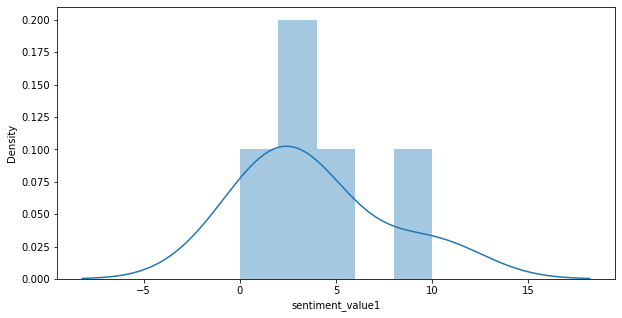

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(sent_df1['sentiment_value1'])